# Imports, dataset download and settings

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import kagglehub

In [36]:
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option("display.max_columns", None)

In [38]:
# Download latest dataset version 

path = kagglehub.dataset_download("tunguz/big-five-personality-test")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Piotr\.cache\kagglehub\datasets\tunguz\big-five-personality-test\versions\1


In [40]:
file_path = os.path.join(path, "IPIP-FFM-data-8Nov2018", "data-final.csv")

big_5 = pd.read_csv(file_path, sep='\t')
df1 = big_5.copy()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015341 entries, 0 to 1015340
Columns: 110 entries, EXT1 to long_appx_lots_of_err
dtypes: float64(104), int64(2), object(4)
memory usage: 852.1+ MB


# Preparing dataset

In [42]:
df1.select_dtypes(include = 'object').head(1) # not applicable

,dateload,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,2016-03-03 02:01:01,GB,51.5448,0.1991


In [44]:
df1.describe()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,EXT1_E,EXT2_E,EXT3_E,EXT4_E,EXT5_E,EXT6_E,EXT7_E,EXT8_E,EXT9_E,EXT10_E,EST1_E,EST2_E,EST3_E,EST4_E,EST5_E,EST6_E,EST7_E,EST8_E,EST9_E,EST10_E,AGR1_E,AGR2_E,AGR3_E,AGR4_E,AGR5_E,AGR6_E,AGR7_E,AGR8_E,AGR9_E,AGR10_E,CSN1_E,CSN2_E,CSN3_E,CSN4_E,CSN5_E,CSN6_E,CSN7_E,CSN8_E,CSN9_E,CSN10_E,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,screenw,screenh,introelapse,testelapse,endelapse,IPC
count,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013275.00,1013275.00,1013275.00,1013558.00,1015341.00,1015341.00
mean,2.65,2.77,3.29,3.14,3.28,2.40,2.77,3.41,2.96,3.56,3.29,3.17,3.85,2.66,2.84,2.84,3.05,2.68,3.09,2.77,2.26,3.83,2.26,3.93,2.27,3.74,2.20,3.69,3.79,3.59,3.30,2.93,3.98,2.62,2.63,2.83,3.70,2.47,3.20,3.59,3.65,2.08,4.00,2.00,3.79,1.89,3.98,3.18,4.12,3.96,97019.95,8341.05,11641.24,7645.37,7143.99,7453.52,10899.23,7039.18,6157.74,7417.39,9434.20,9247.13,7728.74,12843.82,10374.50,8123.31,7107.81,7942.96,5524.53,4755.13,18271.61,8798.99,6635.66,9045.58,11179.48,6255.79,8248.70,8956.07,5365.63,6046.34,12296.67,10254.03,9066.49,9198.06,9035.05,11725.84,5556.95,11138.42,5432.48,10788.70,8387.32,13014.47,7190.82,13289.73,6281.84,8256.58,7689.49,5423.94,6325.80,5336.31,1149.51,826.26,959.07,675.42,2701.41,10.45
std,1.26,1.32,1.22,1.24,1.28,1.23,1.40,1.27,1.35,1.31,1.35,1.23,1.16,1.25,1.27,1.33,1.29,1.34,1.30,1.32,1.34,1.14,1.28,1.13,1.17,1.22,1.12,1.10,1.17,1.08,1.18,1.39,1.04,1.25,1.27,1.42,1.13,1.14,1.28,1.05,1.16,1.11,1.10,1.09,0.99,1.10,1.01,1.26,1.04,1.03,4887845.12,562532.18,2328112.68,338186.04,602378.57,567553.19,2190123.91,368270.69,248150.85,2144985.27,1241508.83,627180.09,709929.31,2401873.27,2181408.32,701385.32,431757.24,2154117.94,445318.62,170542.14,1741056.03,718069.68,259010.18,757183.83,2180418.44,350588.14,666975.94,1399846.88,163231.31,304489.74,1314490.89,572528.45,1257300.68,721609.44,1014837.49,2243966.30,268993.46,565574.04,404109.44,2205455.77,931681.73,1221541.65,376368.73,3047609.98,341401.39,564269.15,584198.71,262974.76,429890.56,440822.49,560.09,180.25,51040.05,20178.64,1483898.06,39.83
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-42958762.00,-75632.00,-3593866.00,-2494907.00,-58566.00,-79860.00,-3594255.00,-461138.00,-59370.00,-142238.00,-112165.00,-71572.00,-41381.00,-3598047.00,-88286.00,-3574100.00,-2520786.00,-3599692.00,-79175662.00,-43558.00,-2757521.00,-3592606.00,-1795552.00,-67786.00,-61865.00,-247504.00,-65423.00,-764938.00,-527846.00,-85674.00,-3590638.00,-35996486.00,-94464.00,-3597020.0

In [46]:
# Create answers_df with columns containing answers and IP

answers_df = df1.iloc[:, [*range(0, 50), 106]]
answers_df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,IPC
0,4.00,1.00,5.00,2.00,5.00,1.00,5.00,2.00,4.00,1.00,1.00,4.00,4.00,2.00,2.00,2.00,2.00,2.00,3.00,2.00,2.00,5.00,2.00,4.00,2.00,3.00,2.00,4.00,3.00,4.00,3.00,4.00,3.00,2.00,2.00,4.00,4.00,2.00,4.00,4.00,5.00,1.00,4.00,1.00,4.00,1.00,5.00,3.00,4.00,5.00,1
1,3.00,5.00,3.00,4.00,3.00,3.00,2.00,5.00,1.00,5.00,2.00,3.00,4.00,1.00,3.00,1.00,2.00,1.00,3.00,1.00,1.00,4.00,1.00,5.00,1.00,5.00,3.00,4.00,5.00,3.00,3.00,2.00,5.00,3.00,3.00,1.00,3.00,3.00,5.00,3.00,1.00,2.00,4.00,2.00,3.00,1.00,4.00,2.00,5.00,3.00,1
2,2.00,3.00,4.00,4.00,3.00,2.00,1.00,3.00,2.00,5.00,4.00,4.00,4.00,2.00,2.00,2.00,2.00,2.00,1.00,3.00,1.00,4.00,1.00,4.00,2.00,4.00,1.00,4.00,4.00,3.00,4.00,2.00,2.00,2.00,3.00,3.00,4.00,2.00,4.00,2.00,5.00,1.00,2.00,1.00,4.00,2.00,5.00,3.00,4.00,4.00,1
3,2.00,2.00,2.00,3.00,4.00,2.00,2.00,4.00,1.00,4.00,3.00,3.00,3.00,2.00,3.00,2.00,2.00,2.00,4.00,3.00,2.00,4.00,3.00,4.00,2.00,4.00,2.00,4.00,3.00,4.00,2.00,4.00,4.00,4.00,1.00,2.00,2.00,3.00,1.00,4.00,4.00,2.00,5.00,2.00,3.00,1.00,4.00,4.00,3.00,3.00,1
4,3.00,3.00,3.00,3.00,5.00,3.00,3.00,5.00,3.00,4.00,1.00,5.00,5.00,3.00,1.00,1.00,1.00,1.00,3.00,2.00,1.00,5.00,1.00,5.00,1.00,3.00,1.00,5.00,5.00,3.00,5.00,1.00,5.00,1.00,3.00,1.00,5.00,1.00,5.00,5.00,5.00,1.00,5.00,1.00,5.00,1.00,5.00,3.00,5.00,5.00,2


In [48]:
# Filter out out-of-range answers in answers_df (answer 0 does not mean 'strongly disagree')

out_of_range_mask = ((answers_df < 1) | (answers_df >5))
out_of_range_indexes = df1.index[out_of_range_mask.any(axis=1)].tolist()

answers_df = answers_df.drop(out_of_range_indexes).reset_index(drop=True)
answers_df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,IPC
0,4.00,1.00,5.00,2.00,5.00,1.00,5.00,2.00,4.00,1.00,1.00,4.00,4.00,2.00,2.00,2.00,2.00,2.00,3.00,2.00,2.00,5.00,2.00,4.00,2.00,3.00,2.00,4.00,3.00,4.00,3.00,4.00,3.00,2.00,2.00,4.00,4.00,2.00,4.00,4.00,5.00,1.00,4.00,1.00,4.00,1.00,5.00,3.00,4.00,5.00,1
1,3.00,5.00,3.00,4.00,3.00,3.00,2.00,5.00,1.00,5.00,2.00,3.00,4.00,1.00,3.00,1.00,2.00,1.00,3.00,1.00,1.00,4.00,1.00,5.00,1.00,5.00,3.00,4.00,5.00,3.00,3.00,2.00,5.00,3.00,3.00,1.00,3.00,3.00,5.00,3.00,1.00,2.00,4.00,2.00,3.00,1.00,4.00,2.00,5.00,3.00,1
2,2.00,3.00,4.00,4.00,3.00,2.00,1.00,3.00,2.00,5.00,4.00,4.00,4.00,2.00,2.00,2.00,2.00,2.00,1.00,3.00,1.00,4.00,1.00,4.00,2.00,4.00,1.00,4.00,4.00,3.00,4.00,2.00,2.00,2.00,3.00,3.00,4.00,2.00,4.00,2.00,5.00,1.00,2.00,1.00,4.00,2.00,5.00,3.00,4.00,4.00,1
3,2.00,2.00,2.00,3.00,4.00,2.00,2.00,4.00,1.00,4.00,3.00,3.00,3.00,2.00,3.00,2.00,2.00,2.00,4.00,3.00,2.00,4.00,3.00,4.00,2.00,4.00,2.00,4.00,3.00,4.00,2.00,4.00,4.00,4.00,1.00,2.00,2.00,3.00,1.00,4.00,4.00,2.00,5.00,2.00,3.00,1.00,4.00,4.00,3.00,3.00,1
4,3.00,3.00,3.00,3.00,5.00,3.00,3.00,5.00,3.00,4.00,1.00,5.00,5.00,3.00,1.00,1.00,1.00,1.00,3.00,2.00,1.00,5.00,1.00,5.00,1.00,3.00,1.00,5.00,5.00,3.00,5.00,1.00,5.00,1.00,3.00,1.00,5.00,1.00,5.00,5.00,5.00,1.00,5.00,1.00,5.00,1.00,5.00,3.00,5.00,5.00,2


In [49]:
# Divide columns into affirmative and negative statements

negation_list =list(answers_df.columns[
[1, 3, 5, 7, 9,
 10, 12, 14, 15, 16, 17, 18, 19,
 20, 22, 24, 26, 
 31, 33, 35, 37, 
 41, 43, 45]
])

affirmative_list = [col for col in answers_df.columns[0:50] if col not in negation_list]

In [50]:
# Create function adding score results to the df

def add_aspect(df):

    # extravertion EXT
    ext_positive = [col for col in affirmative_list if "EXT" in col]
    ext_negative = [col for col in negation_list if "EXT" in col]
    df.loc[:, 'extraversion'] = 20 + df[ext_positive].sum(axis=1) - df[ext_negative].sum(axis=1)

    # emotional stability EST
    est_positive = [col for col in affirmative_list if "EST" in col]
    est_negative = [col for col in negation_list if "EST" in col]
    df.loc[:, 'emotional_stability'] = 38 + df[est_positive].sum(axis=1) - df[est_negative].sum(axis=1)

    # agreeableness AGR
    agr_positive = [col for col in affirmative_list if "AGR" in col]
    agr_negative = [col for col in negation_list if "AGR" in col]
    df.loc[:, 'agreeableness'] = 14 + df[agr_positive].sum(axis=1) - df[agr_negative].sum(axis=1)

    # conscientiousness CSN
    csn_positive = [col for col in affirmative_list if "CSN" in col]
    csn_negative = [col for col in negation_list if "CSN" in col]
    df.loc[:, 'conscientiousness'] = 14 + df[csn_positive].sum(axis=1) - df[csn_negative].sum(axis=1)

    #openness to experience OPN
    opn_positive = [col for col in affirmative_list if "OPN" in col]
    opn_negative = [col for col in negation_list if "OPN" in col]
    df.loc[:, 'openness_to_experience'] = 8 + df[opn_positive].sum(axis=1) - df[opn_negative].sum(axis=1)

In [51]:
add_aspect(answers_df)

In [52]:
answers_df.iloc[:,51:56].describe() # the mean deviates from the expected value

,extraversion,emotional_stability,agreeableness,conscientiousness,openness_to_experience
count,750755.00,750755.00,750755.00,750755.00,750755.00
mean,19.34,19.37,27.66,23.57,29.29
std,9.12,8.68,7.39,7.43,6.30
min,0.00,0.00,0.00,0.00,0.00
25%,12.00,13.00,23.00,18.00,25.00
50%,19.00,19.00,29.00,24.00,30.00
75%,26.00,26.00,33.00,29.00,34.00
max,40.00,40.00,40.00,40.00,40.00


# Constructing plots

In [53]:
def plot_scores(df, start_idx, stop_idx, title, x_label):
    
    colors = ['green', 'purple', 'red', 'gold', 'skyblue']
    aspects = df.columns[start_idx:stop_idx].tolist()

    fig, axes = plt.subplots(1, 5, figsize=(20,4), sharey=True)

    for ax, aspect, color in zip(axes, aspects, colors):
        df[aspect].hist(bins=60, color=color, ax=ax, edgecolor = 'black')
        ax.set_title(aspect.capitalize())
        ax.set_xlabel(x_label)

    axes[0].set_ylabel("Frequency")
    plt.tight_layout()
    plt.suptitle(title, fontsize=18, fontweight='bold', y=1.10, x=0.5)
    plt.show()

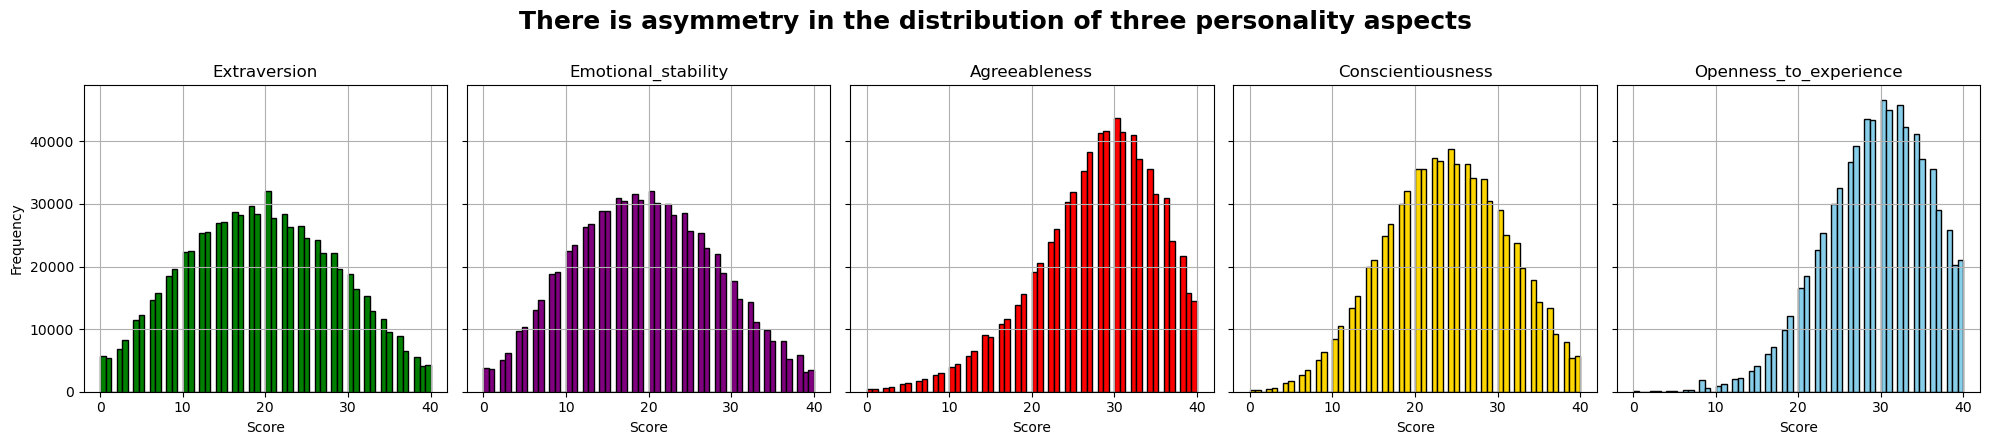

In [55]:
plot_scores(answers_df, 51, 56, "There is asymmetry in the distribution of three personality aspects", "Score")

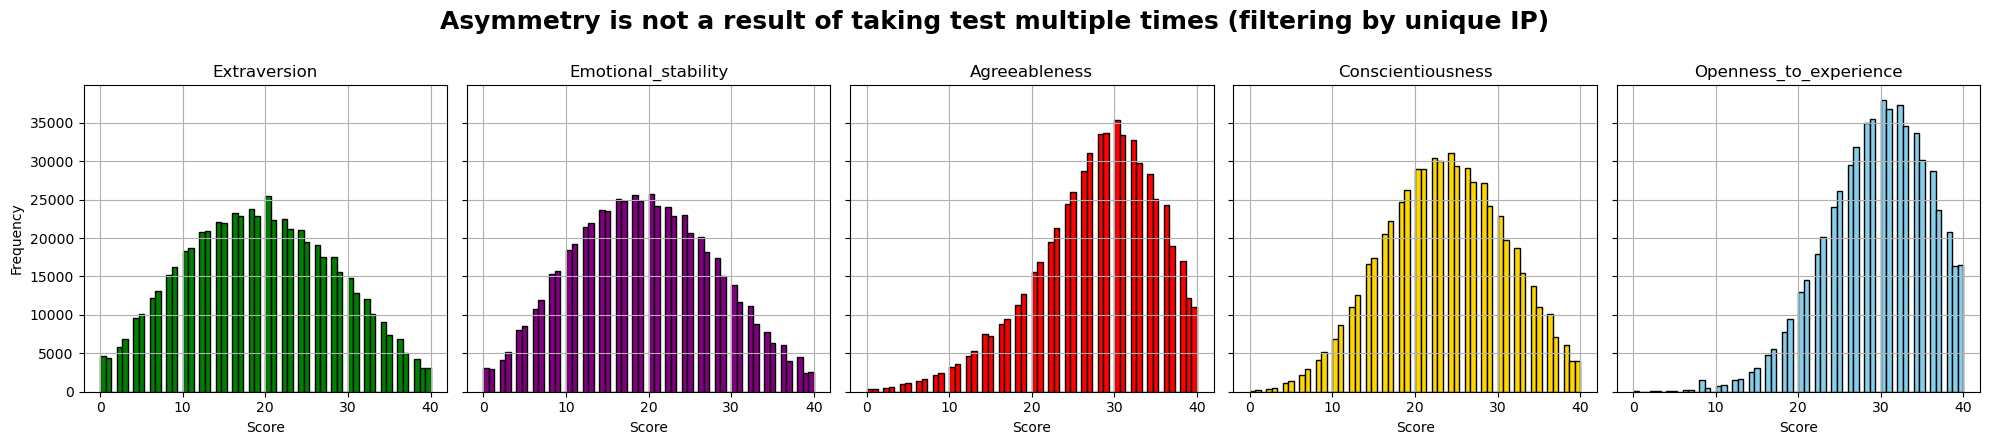

In [56]:
answers_df_1 = answers_df[answers_df['IPC'] == 1]
plot_scores(answers_df_1, 51, 56, "Asymmetry is not a result of taking test multiple times (filtering by unique IP)", "Score")

In [58]:
# Create function adding personality aspect in percentiles to answers_df

def add_percentile(df):
    cols = answers_df.iloc[:,51:56].columns

    for col in cols:
        df.loc[:, col + '_percentile'] = df[col].rank(pct=True) * 100

In [60]:
add_percentile(answers_df)

In [61]:
answers_df.iloc[:,56:61].describe()

,extraversion_percentile,emotional_stability_percentile,agreeableness_percentile,conscientiousness_percentile,openness_to_experience_percentile
count,750755.00,750755.00,750755.00,750755.00,750755.00
mean,50.00,50.00,50.00,50.00,50.00
std,28.85,28.85,28.84,28.85,28.83
min,0.38,0.26,0.03,0.01,0.00
25%,23.43,25.31,24.17,23.62,24.21
50%,49.12,49.22,52.27,51.81,51.18
75%,74.68,76.22,74.34,75.18,74.75
max,99.71,99.77,99.03,99.62,98.60


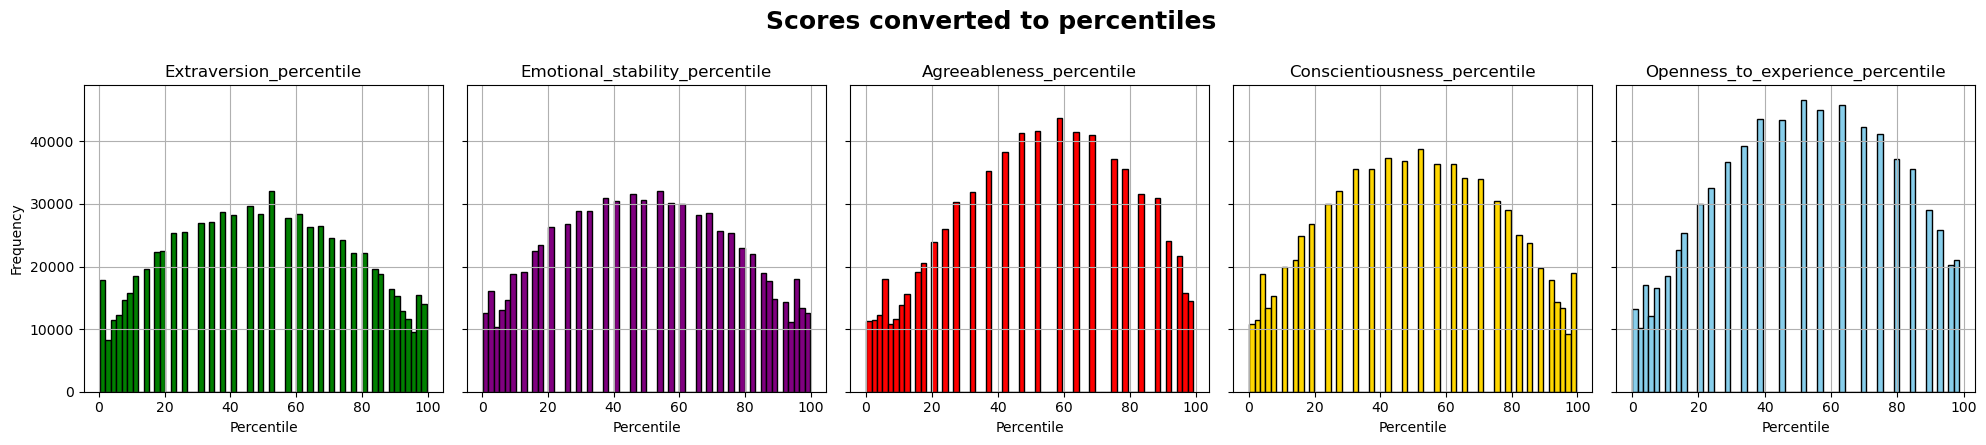

In [62]:
plot_scores(answers_df, 56, 61, "Scores converted to percentiles ", "Percentile")

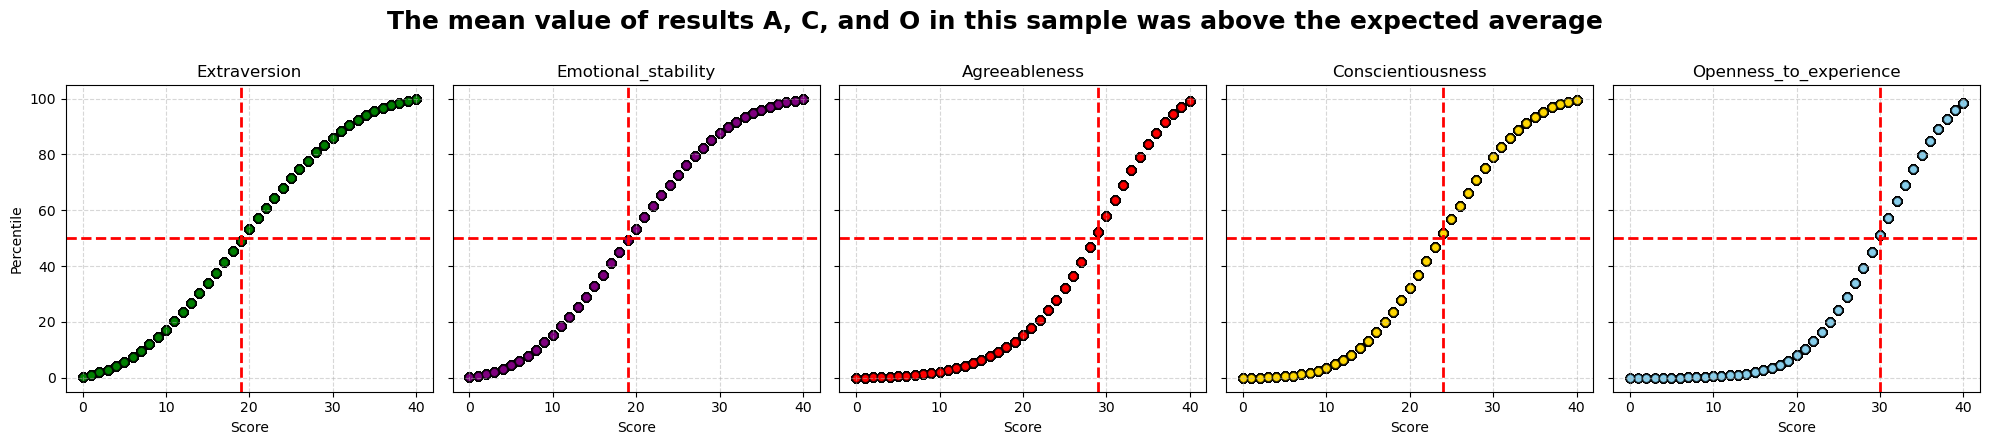

In [63]:
# Create graph showing avarage score for person in the 50th percentile

colors = ['green', 'purple', 'red', 'gold', 'skyblue']
scores = answers_df.columns[51:56].tolist()

fig, axes = plt.subplots(1, 5, figsize=(20,4), sharey=True)

for ax, score, color in zip(axes, scores, colors):
    ax.scatter(answers_df[score], answers_df[score + '_percentile'], edgecolor='black', color=color, alpha=0.6)
    
    ax.set_title(score.capitalize())
    ax.set_xlabel('Score')
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.axhline(y=50, color='red', linestyle='--', linewidth=2)
    

    median_score_idx = answers_df[score + '_percentile'].sub(50).abs().idxmin()
    score_at_50 = answers_df.loc[median_score_idx, score]
    ax.axvline(x=score_at_50, color='red', linestyle='--', linewidth=2)

axes[0].set_ylabel("Percentile")
plt.tight_layout()
plt.suptitle("The mean value of results A, C, and O in this sample was above the expected average", fontsize=18, fontweight='bold', y=1.10, x=0.5)
plt.show()


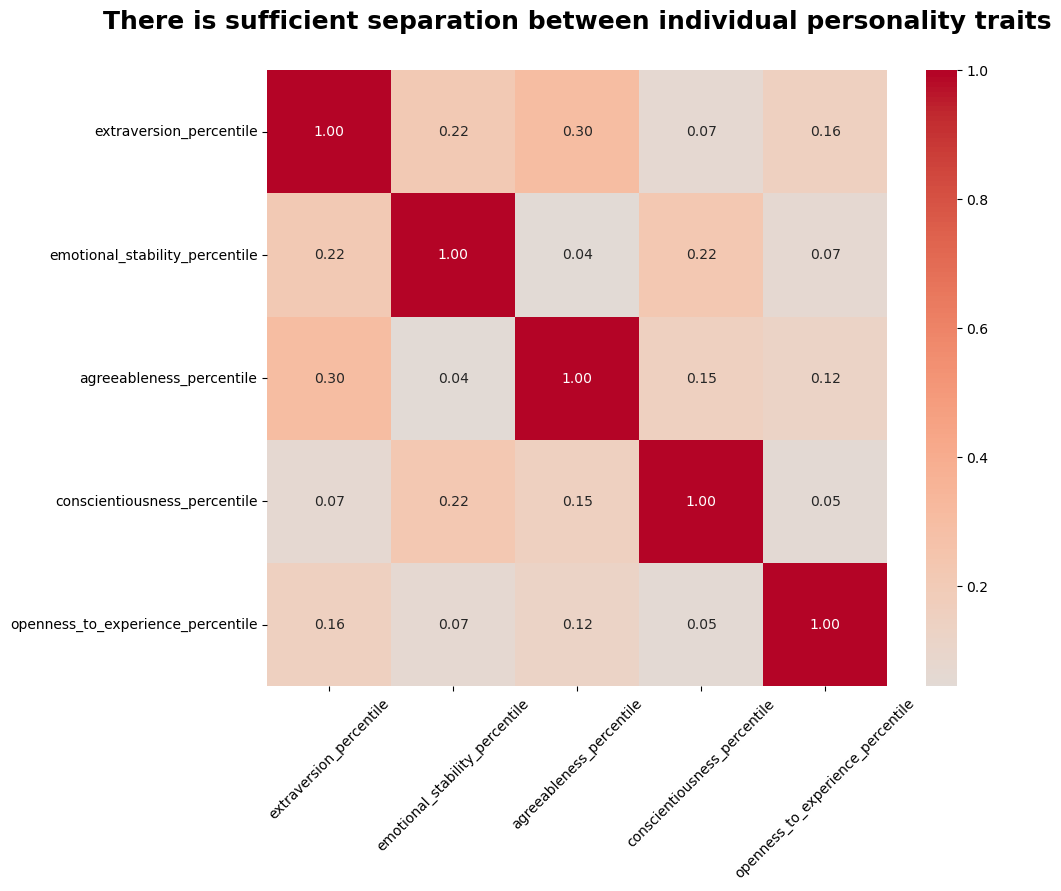

In [64]:
# Check if there was correlation between aspects

percentiles = answers_df.columns[56:61].tolist()
corr_matrix_1 = answers_df[percentiles].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_1, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("There is sufficient separation between individual personality traits", fontweight='bold', fontsize=18, pad = 30)
plt.xticks(rotation=45)
plt.show()

In [65]:
# Add response intensity columns do answers_df

answers_df["extreme_count"] = ((answers_df == 1) | (answers_df == 5)).sum(axis=1)
answers_df["neutral_count"] = (answers_df == 1).sum(axis=1)
answers_df["moderate_count"] = ((answers_df == 2) | (answers_df == 4)).sum(axis=1)

intensity = answers_df.columns[61:66].tolist()
percentiles = answers_df.columns[56:61].tolist()

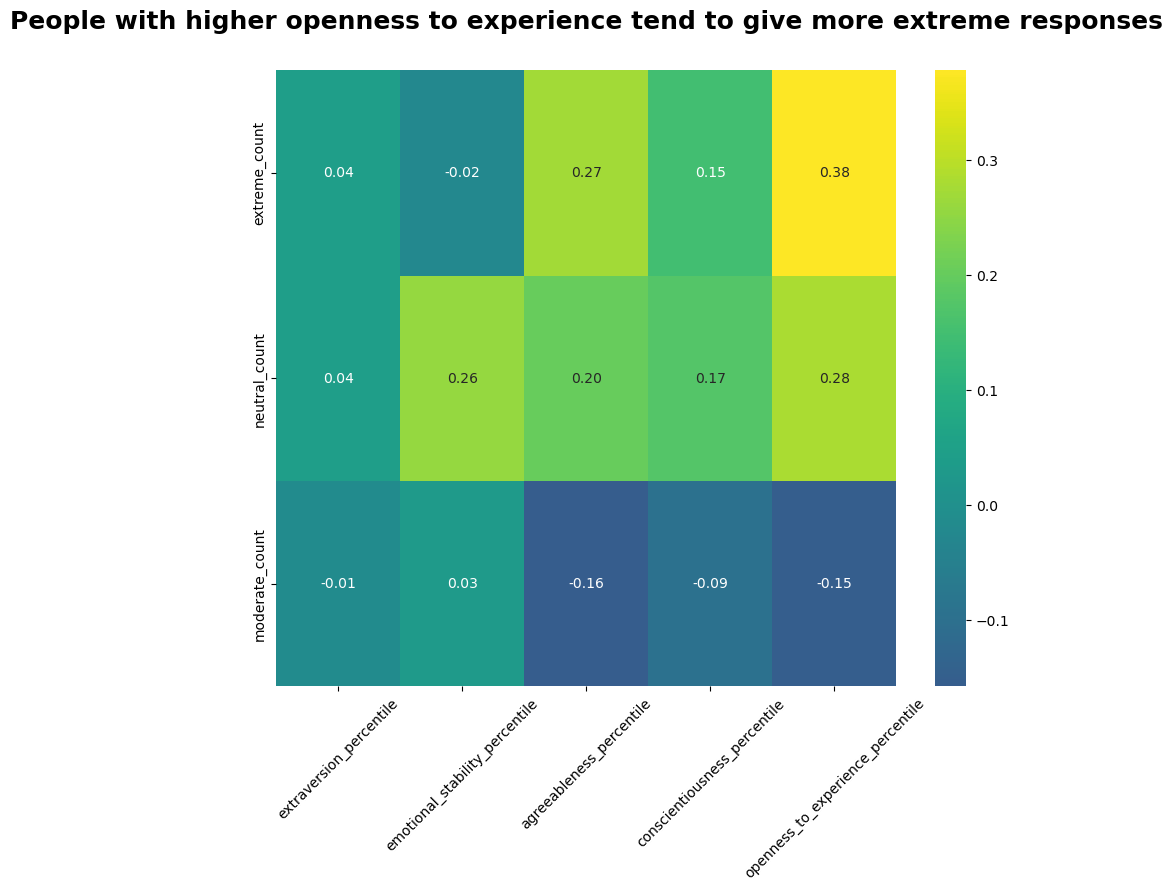

In [66]:
# Check if there was correlation between aspect and response intensity

corr_matrix_2 = answers_df[intensity + percentiles].corr()
corr_between = corr_matrix_2.loc[intensity, percentiles]

plt.figure(figsize=(10, 8))
sns.heatmap(corr_between, annot=True, fmt=".2f", cmap="viridis", center=0)
plt.title("People with higher openness to experience tend to give more extreme responses", fontweight='bold', fontsize=18, pad = 30)
plt.xticks(rotation=45)
plt.show()

# Analyzing questionnaires with skipped questions

In [67]:
# Create new df0 with questionnaires containing empty questions only

df0 = df1.iloc[:,0:50]
df0 = df0[(df0 == 0).any(axis = 1)]

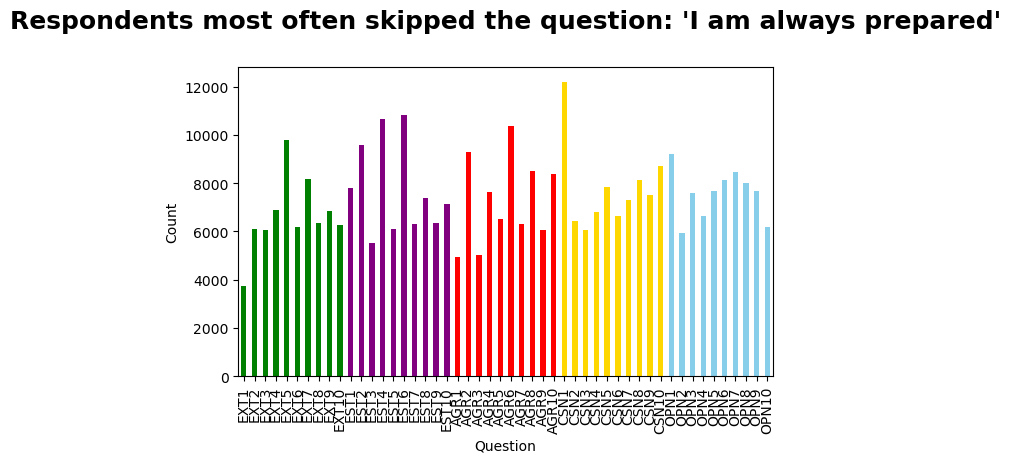

In [109]:
# Find most frequently skipped question

zero_counts = (df0.iloc[:,:50] == 0).sum()
colors2 = [c for c in colors for _ in range(10)]

zero_counts.plot(kind="bar", color = colors2)
plt.xlabel("Question")
plt.ylabel("Count")
plt.title("Respondents most often skipped the question: 'I am always prepared'", fontsize=18, fontweight='bold', y=1.10, x=0.5)
plt.tight_layout()
plt.show()

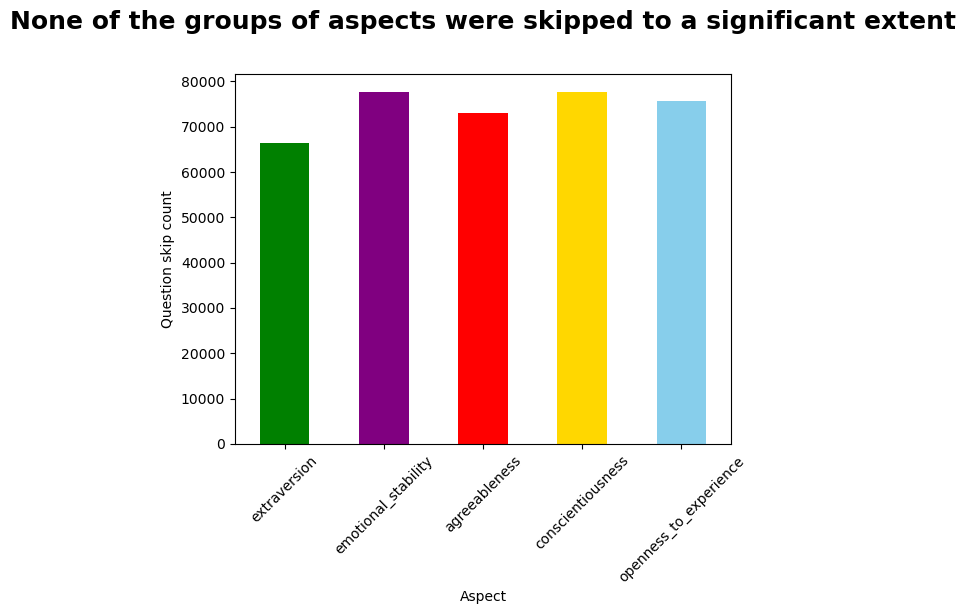

In [103]:
# Group graph above

aspects = answers_df.columns[51:56]
zero_counts_grouped = zero_counts.groupby(np.arange(50) // 10).sum()
zero_counts_grouped.index = aspects

zero_counts_grouped.plot(kind='bar', color = colors)
plt.xticks(rotation=45)
plt.xlabel("Aspect")
plt.ylabel("Question skip count")
plt.title("None of the groups of aspects were skipped to a significant extent", fontsize=18, fontweight='bold', y=1.10, x=0.5)
plt.show()

In [107]:
# Create new full_df to see if there is correlation between aspect and amount of skipped questions

full_df = df1.iloc[:, [*range(0, 50), 106]].copy()

In [71]:
add_aspect(full_df)

In [72]:
add_percentile(full_df)

In [73]:
full_df

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,IPC,extraversion,emotional_stability,agreeableness,conscientiousness,openness_to_experience,extraversion_percentile,emotional_stability_percentile,agreeableness_percentile,conscientiousness_percentile,openness_to_experience_percentile
0,4.00,1.00,5.00,2.00,5.00,1.00,5.00,2.00,4.00,1.00,1.00,4.00,4.00,2.00,2.00,2.00,2.00,2.00,3.00,2.00,2.00,5.00,2.00,4.00,2.00,3.00,2.00,4.00,3.00,4.00,3.00,4.00,3.00,2.00,2.00,4.00,4.00,2.00,4.00,4.00,5.00,1.00,4.00,1.00,4.00,1.00,5.00,3.00,4.00,5.00,1,36.00,26.00,29.00,22.00,35.00,96.57,76.22,53.02,42.02,82.09
1,3.00,5.00,3.00,4.00,3.00,3.00,2.00,5.00,1.00,5.00,2.00,3.00,4.00,1.00,3.00,1.00,2.00,1.00,3.00,1.00,1.00,4.00,1.00,5.00,1.00,5.00,3.00,4.00,5.00,3.00,3.00,2.00,5.00,3.00,3.00,1.00,3.00,3.00,5.00,3.00,1.00,2.00,4.00,2.00,3.00,1.00,4.00,2.00,5.00,3.00,1,10.00,25.00,34.00,27.00,25.00,16.06,72.79,79.81,66.81,27.48
2,2.00,3.00,4.00,4.00,3.00,2.00,1.00,3.00,2.00,5.00,4.00,4.00,4.00,2.00,2.00,2.00,2.00,2.00,1.00,3.00,1.00,4.00,1.00,4.00,2.00,4.00,1.00,4.00,4.00,3.00,4.00,2.00,2.00,2.00,3.00,3.00,4.00,2.00,4.00,2.00,5.00,1.00,2.00,1.00,4.00,2.00,5.00,3.00,4.00,4.00,1,15.00,24.00,32.00,24.00,31.00,32.12,69.15,69.86,52.15,60.70
3,2.00,2.00,2.00,3.00,4.00,2.00,2.00,4.00,1.00,4.00,3.00,3.00,3.00,2.00,3.00,2.00,2.00,2.00,4.00,3.00,2.00,4.00,3.00,4.00,2.00,4.00,2.00,4.00,3.00,4.00,2.00,4.00,4.00,4.00,1.00,2.00,2.00,3.00,1.00,4.00,4.00,2.00,5.00,2.00,3.00,1.00,4.00,4.00,3.00,3.00,1,16.00,21.00,28.00,15.00,29.00,35.79,57.33,47.47,13.31,48.91
4,3.00,3.00,3.00,3.00,5.00,3.00,3.00,5.00,3.00,4.00,1.00,5.00,5.00,3.00,1.00,1.00,1.00,1.00,3.00,2.00,1.00,5.00,1.00,5.00,1.00,3.00,1.00,5.00,5.00,3.00,5.00,1.00,5.00,1.00,3.00,1.00,5.00,1.00,5.00,5.00,5.00,1.00,5.00,1.00,5.00,1.00,5.00,3.00,5.00,5.00,2,19.00,31.00,36.00,38.00,38.00,47.35,89.72,88.29,98.09,93.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015336,4.00,2.00,4.00,3.00,4.00,3.00,3.00,3.00,3.00,3.00,4.00,3.00,3.00,3.00,4.00,3.00,4.00,3.00,3.00,3.00,5.00,4.00,2.00,5.00,2.00,4.00,2.00,4.00,4.00,4.00,2.00,3.00,3.00,3.00,4.00,4.00,4.00,2.00,3.00,3.00,2.00,2.00,4.00,3.00,4.00,2.00,4.00,2.00,2.00,4.00,2,24.00,17.00,28.00,21.00,23.00,67.09,40.49,47.47,37.11,19.07
1015337,4.00,3.00,4.00,3.00,3.00,3.00,4.00,4.00,3.00,3.00,4.00,3.00,5.00,1.00,5.00,5.00,4.00,4.00,4.00,5.00,2.00,4.00,1.00,4.00,3.00,5.00,3.00,3.00,5.00,3.00,3.00,2.00,3.00,4.00,3.00,3.00,2.00,3.00,2.00,3.00,4.00,1.00,5.00,1.00,5.00,1.00,3.00,4.00,5.00,4.00,1,22.00,6.00,29.00,18.00,35.00,59.69,5.82,53.02,23.61,82.09
1015338,4.00,2.00,4.00,3.00,5.00,1.00,4.00,2.00,4.00,4.00,3.00,2.00,4.00,3.00,2.00,2.00,4.00,2.00,4.00,1.00,3.00,5.00,5.00,3.00,2.00,3.00,2.00,4.00,3.00,5.00,4.00,5.00,3.00,5.00,1.00,5.00,1.00,4.00,1.00,4.00,5.00,1.00,5.00,1.00,4.00,1.00,5.00,5.00,4.00,5.00,6,29.00,21.00,25.00,9.00,38.00,83.02,57.33,32.57,2.46,93.66
1015339,2.00,4.00,3.00,4.00,2.00,2.00,1.00,4.00,2.00,4.00,4.00,3.00,4.00,2.00,4.00,4.00,2.00,2.00,4.00,4.00,2.00,3.00,2.00,4.00,3.00,4.00,2.00,4.00,4.00,3.00,4.00,2.00,4.00,2.00,2.00,2.00,4.00,2.00,4.00,4.00,5.00,2.00,4.00,2.00,3.00,2.00,4.00,5.00,5.00,3.00,1,12.00,15.00,27.00,28.00,31.00,21.95,32.36,42.12,71.37,60.70


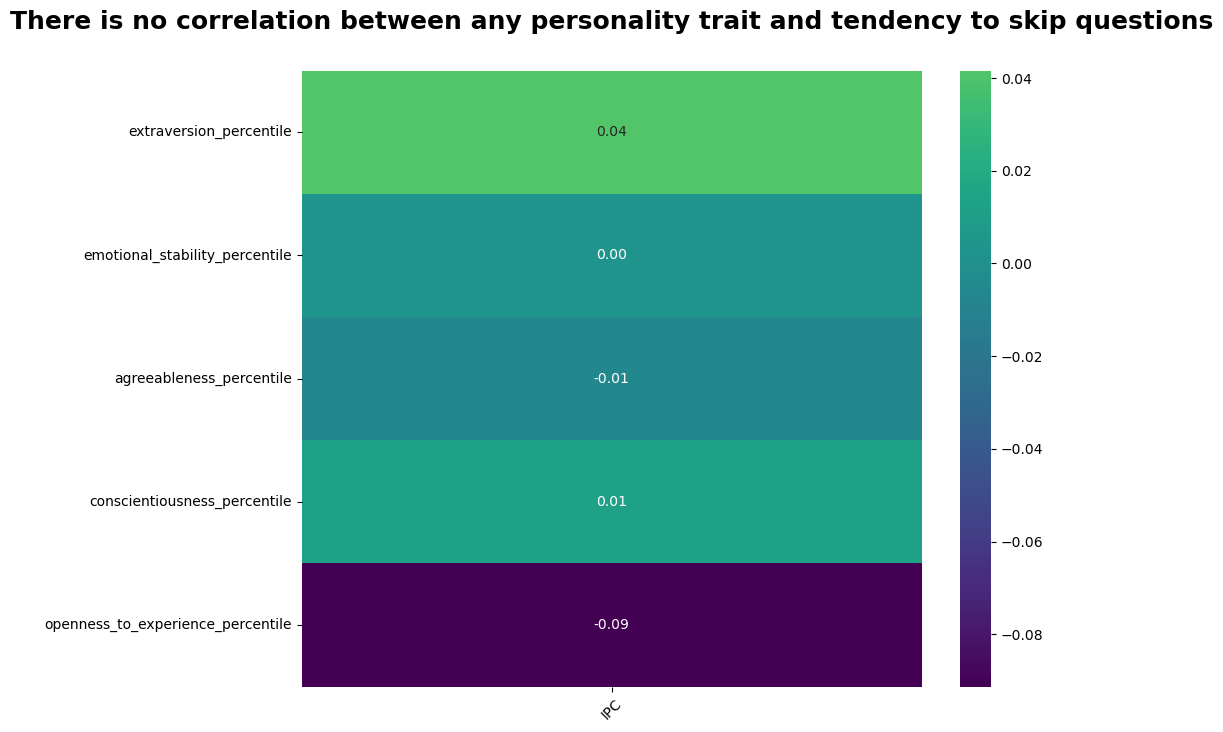

In [101]:
# Create a correlation plot between personality traits and skipping questions

aspect_percentiles = [col + "_percentile" for col in aspects]

# macierz korelacji
corr_matrix_3 = full_df[aspect_percentiles + ["IPC"]].corr()

# korelacje tylko IPC vs percentyle aspektów
corr_between_3 = corr_matrix_3.loc[aspect_percentiles, ["IPC"]]

plt.figure(figsize=(10, 8))
sns.heatmap(corr_between_3, annot=True, fmt=".2f", cmap="viridis", center=0)
plt.title("There is no correlation between any personality trait and tendency to skip questions", fontweight='bold', fontsize=18, pad=30)
plt.xticks(rotation=45)
plt.show()

# Conclusion

- The very large sample size of over one million provides greater statistical power. However, the results are skewed toward higher values, suggesting that the questions may have been not optimally designed.
  
- Although the presence of skipped questions allowed for a more detailed analysis, it may also introduce errors. A response marked as '0' does not clearly indicate whether the answer was below '1', accidentally skipped, or intentionally left blank.

  
- Further work could include analyzing the response time. Accurate data cleaning would be necessary, with attention to outliers. It would be possible to identify which question was answered the fastest and which took the longest as well as look for any correlation between personality aspect and speed of answering questions.
